In [1]:
%matplotlib inline

In [2]:
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import estimate_critical_q as est_qc
import estimate_exponents as est_exps
import tools

In [3]:
def test_derivative(x, y, der_analytical, nPointsTest, error, 
                    precision, num_multiply=10):

    g = tools.derivative(x, y)

    out = nPointsTest//10
    X = np.linspace(min(x),max(x), nPointsTest)[out:-out]

    Y_analytical = np.array([der_analytical(i) for i in X])
    Y = np.array([g(i) for i in X])
    if error == 'rel':
        rel_err = np.abs((Y_analytical-Y)/Y_analytical)
    elif error == 'abs':
        rel_err = np.abs((Y_analytical-Y))
    else:
        raise Exception("Parameter error should be in ['rel', 'abs'].")
    
    plt.figure()
    plt.plot(X, Y_analytical, label='analytical', alpha=0.7)
    plt.plot(X, Y, '.', label='numerical', alpha=0.7);
    plt.title('Extremes of the interval are not tested')
    plt.xlabel('x', fontsize=16)
    plt.ylabel(r"$g'(x)$", fontsize=16)
    plt.legend(loc=(1.05, 0))
    plt.show()
    
    plt.figure()
    plt.plot(X, rel_err, '.-', label='error')
    plt.axhline(precision, color='red', lw=0.5, label='precision')
    plt.xlabel('x', fontsize=16)
    plt.ylabel(r"error", fontsize=16)
    plt.show()

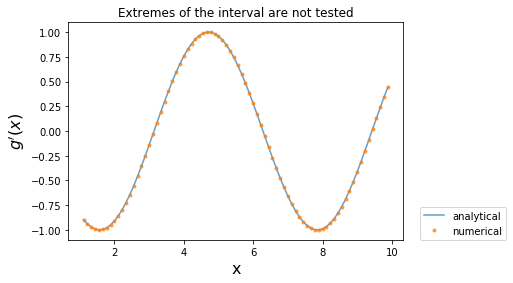

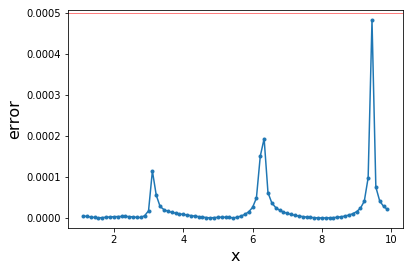

In [4]:
x = np.linspace(0, 11, num=102)
y = np.cos(x)
g_analytical = lambda x: -np.sin(x)

test_derivative(x, y, g_analytical, 100, 'rel', 5e-4, 20)

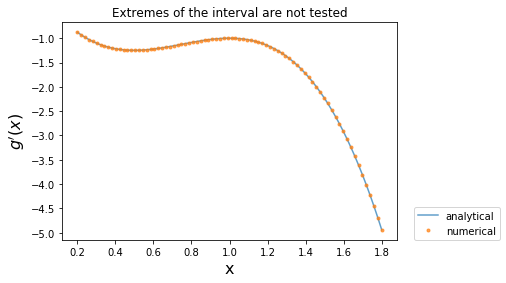

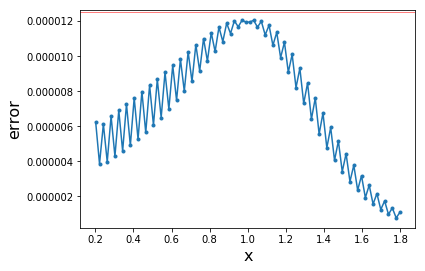

In [5]:
x = np.linspace(0, 2, num=51)
y = -x**4 + 3*x**3 - 3*x**2 + 2
der_analytical = lambda x: -4*x**3 + 9*x**2 - 6*x
        
test_derivative(x, y, der_analytical, 100, 'rel', 1.25e-5)

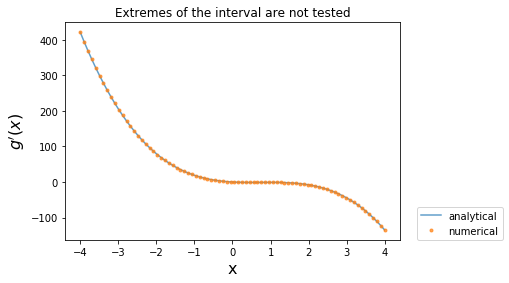

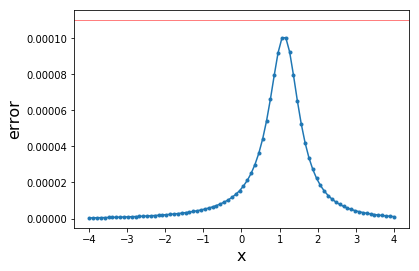

In [6]:
x = np.linspace(-5, 5, num=101)
y = -x**4 + 3*x**3 - 3*x**2 + 2
der_analytical = lambda x: -4*x**3 + 9*x**2 - 6*x
        
test_derivative(x, y, der_analytical, 100, 'rel', 1.1e-4)

In [7]:
db_path = 'test__full.csv'
v = 0.35

full = pd.read_csv(db_path, index_col=0)

# Select the data corresponding to the given visibility v.
phys_quant = full[full.v == v]

# Get the number of sites
N = phys_quant.N.unique()

# Set the index to N and q
phys_quant.set_index(['N','q'], inplace=True)

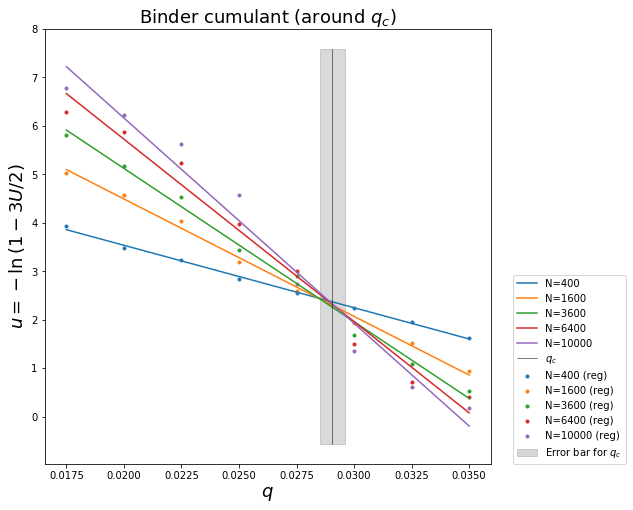


CRITICAL POINT

       q_c       = 0.02905032
       q_c error = 0.00053568



In [8]:
qc, qc_error, best_regs, binder = est_qc.estimate(N[:], phys_quant,
                                               do_plot=True)

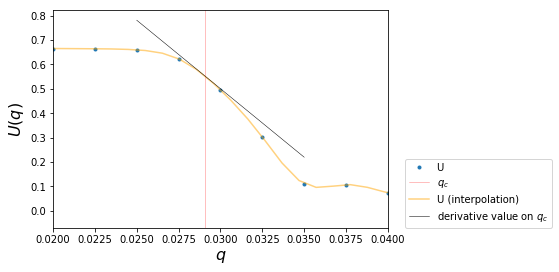

In [9]:
n = 10000

q = np.array(phys_quant.loc[n].index)
f = interp1d(q, phys_quant.loc[n].U, kind='cubic')

g = tools.derivative(q, phys_quant.loc[n].U)

phys_quant.loc[n].U.plot(marker='.', ls='')
plt.axvline(qc, color='red', alpha=0.5, lw=0.5, label='$q_c$')

x = np.linspace(0, 0.05)[1:-1]
y = [f(i) for i in x]
plt.plot(x, y, color='orange', alpha=0.5, label='U (interpolation)')

x = np.linspace(0.025, 0.035)
y = [f(qc) + g(qc)*(i-qc) for i in x]
plt.plot(x, y, color='black', lw=0.5, 
         label='derivative value on $q_c$');

plt.legend(loc=(1.05, 0))
plt.xlabel("$q$", fontsize=16)
plt.ylabel("$U(q)$", fontsize=16)
plt.xlim(0.020, 0.040);

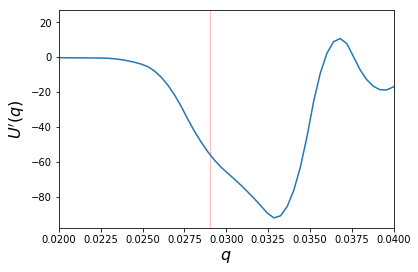

In [10]:
x = np.linspace(min(q),max(q),500)[1:-1]
y = [g(i) for i in x]
plt.plot(x, y, '-');
plt.axvline(qc, color='red', alpha=0.5, lw=0.5);

plt.xlabel("$q$", fontsize=16)
plt.ylabel("$U'(q)$", fontsize=16)

plt.xlim(0.020, 0.040);

In [15]:
tools.express_measure_with_error(3012,99.3)

(3000.0, 100.0)

In [14]:
tools.express_measure_with_error(3012,91.3)

(3010.0, 90.0)

In [21]:
tools.express_measure_with_error(0.666,0.000088, 'A')

'A = 0.66600 ± 0.00009'